# Entrance Challenge: When Will the Sakura Bloom?

***

**Name：AI-9

**Submission Date：03-12-2017

***

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) 
{
    return false;
} 
// This code snippet is used to turn off auto scrolling in outputs
// Ignore this snippet as it is not the part of the project

<IPython.core.display.Javascript object>

# 0. Basics of the Sakura Bloom-cycle (5pts total)

In a year, sakura trees basically go through 4 phases: energy production, hibernation, growth, and of course flowering. These phases
roughly follow the seasons, but not exactly. <br>

   Production phase： Initial development of the buds（Summer-Fall） <br>
   Hibernation phase： Bud growth stops while the tree goes into hibernation（Late Fall-Winter） <br>
   Growth phase： Buds once again continue to grow when the tree comes out of its winter hibernation（Late Winter-Spring） <br>
   Flowering phase： The buds finally bloom in spring (as climate conditions allow), once they have been able to fully develop.（Spring） <br>
    
Each year, near the end of winter but before the trees finally bloom, the hibernation period ends. The sakura that rested through the winter once gain become metabolically active, and the buds continue to grow (though we may not immediately notice when this happens.) However, the cycle is not simply clockwork- for example, in places where the temperature is above 20℃ year-round, the trees are unable to hibernate sufficiently, and thus cannot blossom.
    
In this challenge, we have outlined the basic mechanism by which the sakura reach their eventual bloom-date. We consider building a bloom-date prediction model for the case of sakura in Tokyo, with the data split as follows: <br>
    
Test years： 1966, 1971, 1985, 1994, and 2008 <br>
Training years: 1961 to 2017 (Excluding the test years) <br>
    
You should fit the model to the data from the training years, then use the model to predict the bloom-date for each of the test years. The 3 models to be applied to the data are described below.
    


### Problem 0-1: (5pts)
Acquire data of sakura blooming date (桜の開花日) for Tokyo from 1961 to 2017 using the Japanese Meteorological Agency website (気象庁).

In [2]:
# Problem 0-1

# Data Acquisition
  # The Bloom Dates were collected from the link below:
    # http://www.data.jma.go.jp/sakura/data/sakura003_06.html
  # The Dates were arranged in a CSV file named BloomDates.csv (Check the file in the folder).
  # This file was uploaded in the program and manipulated for further operation. 
  # The file named SakuraData.csv in the folder contains the full data. It's the English version of the file tokyo.csv.

***
## 1. Prediction using the "600 Degree Rule" (15pts total)

For a rough approximaton of the bloom-date, we start with a simple "rule-based" prediction model, called the "600 Degree Rule". The rule consists of logging the maximum temperature of each day, starting  on February 1st, and sum these temperatures until the sum surpasses 600$^\circ$C. The day that this happens is the predicted bloom-date. This 600$^\circ$C threshold is used to easily predict bloom-date in various locations varies by location. However, for more precise predictions, it should be set differently for every location. In this challenge, we verify the accuracy of the "600 Degree Rule" in the case of Tokyo.

### Problem 1-1: (5pts)
From here-on, we refer to the bloom-date in a given year $j$ as $BD_{j}$. For each year in the training data, calculate the accumulated daily maximum temperature from February 1st to the actual bloom-date $BD_{j}$, and plot this accumulated value over the training period. Then, average this accumulated value as $T_{mean}$, and verify whether we should use 600$^\circ$C as a rule for Tokyo.


Tmean: 638.356
600 degree Celsius should not be used as a rule for Tokyo

    Training Years  Accumulated Values of Max Temperature
0             1961                                  721.0
1             1962                                  768.1
2             1963                                  701.7
3             1964                                  676.6
4             1965                                  642.2
5             1967                                  660.8
6             1968                                  654.6
7             1969                                  724.0
8             1970                                  696.3
9             1972                                  610.4
10            1973                                  705.3
11            1974                                  658.0
12            1975                                  607.9
13            1976                                  596.7
14            1977                                  556

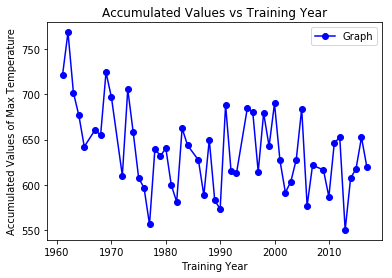

In [3]:
# Problem 1-1

import math
import numpy as np
import pandas as pd
import sklearn.metrics as mc
import sklearn.neural_network
from matplotlib import pyplot as plt
import datetime

Sakura=pd.read_csv('SakuraData.csv')
BD=pd.read_csv('BloomDates.csv')

# Year Separation
Test_years=[1966,1971,1985,1994,2008]
Training_years=[]
for i in range(1961,2018):
    if i not in Test_years:
        Training_years=Training_years+[i]

# Data Separation
trnd = Sakura
tstd = Sakura
BDtrn=BD
BDtst=BD
for i in Test_years:
    trnd = trnd[trnd.year != i]
    BDtrn=BDtrn[BDtrn.year != i]
for i in Training_years:
    tstd = tstd[tstd.year != i]
    BDtst=BDtst[BDtst.year != i]

# Temperature Accumulation from trnd
BD_Feb1=[]
ltr=len(Training_years)
for i in range(ltr):
    d1 = datetime.date(BDtrn.values[i][0],BDtrn.values[i][1],BDtrn.values[i][2])
    d2 = datetime.date(BDtrn.values[i][0],2,1)
    d = (d1 - d2).days+1
    BD_Feb1=BD_Feb1+[d]    # This List contains time delay in days from February 1 to Bloom Date (Training Data)

Accumulated_Value=[]
for i in range(ltr):
    acmxt=0
    x=trnd[trnd.year.isin([Training_years[i]])]   # Taking each Training Year one by one
    for j in range(31,31+BD_Feb1[i]):
        acmxt=acmxt+x.values[j][10]
    Accumulated_Value=Accumulated_Value+[float("{:.3f}".format(acmxt))]
Tmean=sum(Accumulated_Value)/ltr
Tmean=float("{:.3f}".format(Tmean))
print("\nTmean:",Tmean)
if(Tmean!=600):
    print("600 degree Celsius should not be used as a rule for Tokyo\n")
else:
    print("600 degree Celsius should be used as a rule for Tokyo")


# Output Dataframe
df0={'Training Years':Training_years,'Accumulated Values of Max Temperature':Accumulated_Value}
df0=pd.DataFrame(data=df0)
df0=df0[['Training Years','Accumulated Values of Max Temperature']]
print(df0)

# Plotting P 1-1
plt.figure(1)
plt.plot(Training_years,Accumulated_Value,'-bo',label="Graph")
plt.xlabel('Training Year')
plt.ylabel('Accumulated Values of Max Temperature')
plt.title("Accumulated Values vs Training Year")
plt.legend()
plt.show()

### Problem 1-2: (10pts)

Use the average accumulated value $T_{mean}$ calculated in 1-1 to predict $BD_{j}$ for each test year, and show the error from the actual $BD_{j}$. Compare to the prediction results when 600$^\circ$C is used a threshold value, and evaluate both models using the coefficient of determination ($R^2$ score).


Accuracy_Tmean: 0.2
Accuracy_600: 0.2

Actual Bloom Dates:
     year  month  day
5   1966      3   20
10  1971      3   30
24  1985      4    3
33  1994      3   31
47  2008      3   22
Prediction using Tmean:
 [[1966    3   23]
 [1971    3   29]
 [1985    4    1]
 [1994    3   31]
 [2008    3   25]]
Prediction using 600:
 [[1966    3   20]
 [1971    3   27]
 [1985    3   29]
 [1994    3   28]
 [2008    3   23]]
   Test Years  Error for Tmean in Days  Error for 600 in Days
0        1966                        3                      0
1        1971                        1                      3
2        1985                        2                      5
3        1994                        0                      3
4        2008                        3                      1

R-Square Score(Tmean): 0.832
R-Square Score(600): 0.679


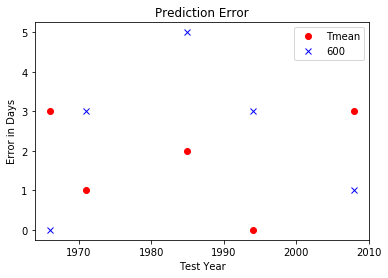

In [4]:
# Problem 1-2

# Prediction using Tmean
BDpredT=[]
for i in range(5):
    acmxt=0
    x=tstd[tstd.year.isin([Test_years[i]])] # Taking each Test Year one by one
    j=31
    while acmxt<Tmean:
        acmxt=acmxt+x.values[j][10]
        j=j+1
    j=j-1 # This is the row number of the predicted Bloom Date of a particular Test Year Data
    p=[x.values[j][1],x.values[j][2],x.values[j][3]] # Predicted Bloom Date
    BDpredT=BDpredT+[p]
BDpredT=np.asarray(BDpredT,dtype=int)  # Converting list to 2D array
# Error for Tmean_Rule
ErT=[]
for i in range(5):
    d1=datetime.date(BDpredT[i][0],BDpredT[i][1],BDpredT[i][2])
    d2=datetime.date(BDtst.values[i][0],BDtst.values[i][1],BDtst.values[i][2])
    d=abs(d1-d2).days
    ErT=ErT+[d]
aT=ErT.count(0)
print("\nAccuracy_Tmean:",aT/5)
# R2 for Tmean_Rule
PDaysT=[]  # Predicted difference in days from January 1 including January 1
ADays=[]  # Actual difference in days from January 1 including January 1
for i in range(5):
    d1=datetime.date(BDtst.values[i][0],BDtst.values[i][1],BDtst.values[i][2])
    d2=datetime.date(BDpredT[i][0],BDpredT[i][1],BDpredT[i][2])
    d3=datetime.date(BDtst.values[i][0],1,1)
    da=abs(d1-d3).days+1
    dp=abs(d2-d3).days+1
    ADays=ADays+[da]
    PDaysT=PDaysT+[dp]
R2T=mc.r2_score(ADays,PDaysT) # Sklearn Builtin function
R2T=float("{:.3f}".format(R2T))

# Prediction using 600
BDpred6=[]
for i in range(5):
    acmxt=0
    x=tstd[tstd.year.isin([Test_years[i]])] # Taking each Test Year one by one
    j=31
    while acmxt<600:
        acmxt=acmxt+x.values[j][10]
        j=j+1
    j=j-1 # This is the row number of the predicted Bloom Date of a particular Test Year
    p=[x.values[j][1],x.values[j][2],x.values[j][3]] # Predicted Bloom Date
    BDpred6=BDpred6+[p]
BDpred6=np.asarray(BDpred6,dtype=int)  # Converting list to 2D array
# Error for 600_Rule
Er6=[]
for i in range(5):
    d1=datetime.date(BDpred6[i][0],BDpred6[i][1],BDpred6[i][2])
    d2=datetime.date(BDtst.values[i][0],BDtst.values[i][1],BDtst.values[i][2])
    d=abs(d1-d2).days
    Er6=Er6+[d]
a6=Er6.count(0)
print("Accuracy_600:",a6/5)
# R2 for 600_Rule
PDays6=[]  # Predicted difference in days from January 1 including January 1
for i in range(5):
    d1=datetime.date(BDpred6[i][0],BDpred6[i][1],BDpred6[i][2])
    d2=datetime.date(BDtst.values[i][0],1,1)
    dp=abs(d1-d2).days+1
    PDays6=PDays6+[dp]
R26=mc.r2_score(ADays,PDays6) # Sklearn Builtin function
R26=float("{:.3f}".format(R26))

# Output Dataframe
print('\nActual Bloom Dates:\n',BDtst)
print('Prediction using Tmean:\n',BDpredT)
print('Prediction using 600:\n',BDpred6)
df1={'Test Years':Test_years,'Error for Tmean in Days':ErT,'Error for 600 in Days':Er6}
df1=pd.DataFrame(data=df1)
df1=df1[['Test Years','Error for Tmean in Days','Error for 600 in Days']]
print(df1)
print("\nR-Square Score(Tmean):",R2T)
print("R-Square Score(600):",R26)

# Plotting P 1-2
plt.figure(2)
plt.plot(Test_years,ErT,"ro",label="Tmean")
plt.plot(Test_years,Er6,"bx",label="600")
plt.xlabel('Test Year')
plt.ylabel('Error in Days')
plt.title("Prediction Error")
plt.legend()
plt.show()

***
## 2. Linear Regression Model: Transform to Standard Temperature (30pts total)

The year to year fluctuation of the bloom-date depends heavily upon the actual temperature fluctuation (not just the accumulated maximum). In order to get to a more physiologically realistic metric,  Sugihara et al. (1986) considered the actual effect of temperature on biochemical activity. They introduced a method of "standardizing" the temperatures measured, according to the fluctuation relative to a standard temperature.

In order to make such a standardization, we apply two major assumptions, outlined below.

#### 1) The Arrhenius equation: <br>

The first assumption, also known in thermodynamics as the "Arrhenius equation", deals with chemical reaction rates and can be written as follows:

$$
k = A \exp{ \Bigl(- \frac{E_{a}}{RT}} \Bigr)
$$ <br>

Basically, it says that each reaction has an activation energy, $E_{a}$ and a pre-exponential factor $A$. Knowing these values for the particular equation, we can find the rate constant $k$ if we know the temperature, $T$, and applying the universal gas constant, $R = 8.314 \rm [J/K・mol]$.

#### 2) Constant output at constant temperature: <br>

The second assumption, is simply that the output of a reaction is a simple product of the duration and the rate constant $k$, and that product is constant even at different temperatures.
    
$$
tk = t'k' = t''k'' = \cdots = \rm{const}
$$ <br>


Making the assumptions above, we can determine a "standard reaction time", $t_{s}$ required for the bloom-date to occur. We can do so in the following way:

<br>
$$
t_{s} = \exp \Bigl( \frac{E_{a}(T_{i, j} - T_{s})}{RT_{i, j}T_{s}}\Bigr)
$$ <br>

We define $T_{i, j}$ as the daily average temperature, and use a standard temperature of $T_{s} = 17^\circ\rm{C}$. For a given year $j$, with the last day of the hibernation phase set as $D_ {j}$, we define the number of "transformed temperature days",  $DTS_{ J}$,  needed to reach from $D_ {j}$ to the bloom-date $BD_{j}$ with the following equation:


<br>
$$
DTS_{j} = \sum_{i=D_{j}}^{BD_{j}} t_{s} = \sum_{i=D_{j}}^{BD_{j}} \exp \Bigl( \frac{E_{a}(T_{i, j} - T_{s})}{RT_{i, j}T_{s}}\Bigr)
$$ <br>



From that equation, we can find the average $DTS$ for $x$ number of years ($DTS_{ mean}$) as follows: 

<br>
$$
\begin{align}
DTS_{\rm{mean}} &= \frac{1}{x} \sum_{j}^{x} DTS_{j} \\
&= \frac{1}{x} \sum_{j}^{x} \sum_{i=D_{j}}^{BD_{j}} \exp \Bigl( \frac{E_{a}(T_{i, j} - T_{s})}{RT_{i, j}T_{s}}\Bigr)
\end{align}
$$ <br> <br>

In this exercise, we assume that $DTS_{ mean}$ and $E_{ a}$ are constant values, and we use the data from the training years to fit these 2 constants. The exercise consists of 4 steps:
1. Calculate the last day of the hibernation phase $D_ {j}$ for every year $j$.
2. For every year $j$, calculate $DTS_{ j}$ as a function of $E_{ a}$, then calculate the average (over training years) $DTS_{ mean}$ also as a function of $E_{ a}$.
3. For every year $j$, and for every value of $E_{ a}$, accumulate $t_{s}$ from $D_ {j}$ and predict the bloom date $BD_{j}^{\rm{pred}}$ as the day the accumulated value surpasses $DTS_{ mean}$. Calculate the bloom date prediction error as a function of $E_{ a}$, and find the optimal $E_{ a}$ value that minimizes that error.
4. Use the previously calculated values of $D_ {j}$, $DTS_{ mean}$, and $E_{ a}$ to predict bloom-day on years from the test set.


### Problem 2-1: (5pts)
According to Hayashi et al. (2012), the day on which the sakura will awaken from their hibernation phase, $D_{j}$, for a given location, can be approximated by the following equation:
<br> <br>
$$
D_{j} = 136.75 - 7.689 \phi + 0.133 \phi^{2} -1.307\ln L + 0.144T_{F} + 0.285T_{F}^2
$$ <br>

where $\phi$ is the latitude [°N], $L$ is the distance from the nearest coastline [km], and $T_{F}$ is that location's average temperature [°C] over the first 3 months of a given year. In the case of Tokyo, $\phi = 35°40'$ and $L=4\rm{km}$.

Find the $D_{j}$ value for every year $j$ from 1961 to 2017 (including the test years), and plot this value on a graph. 

(In Problem 1, we had assumed a $D_j$ of February 1st.)


     All Years  Dj
0        1961  39
1        1962  42
2        1963  38
3        1964  40
4        1965  39
5        1966  45
6        1967  42
7        1968  44
8        1969  43
9        1970  39
10       1971  43
11       1972  46
12       1973  45
13       1974  40
14       1975  41
15       1976  45
16       1977  41
17       1978  42
18       1979  51
19       1980  42
20       1981  42
21       1982  45
22       1983  45
23       1984  36
24       1985  41
25       1986  39
26       1987  46
27       1988  45
28       1989  51
29       1990  48
30       1991  47
31       1992  48
32       1993  47
33       1994  44
34       1995  46
35       1996  45
36       1997  50
37       1998  47
38       1999  49
39       2000  48
40       2001  45
41       2002  56
42       2003  44
43       2004  50
44       2005  45
45       2006  46
46       2007  55
47       2008  47
48       2009  50
49       2010  47
50       2011  44
51       2012  42
52       2013  49
53       2014  47
54      

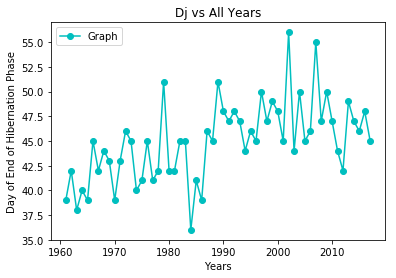

In [5]:
# Problem 2-1

# Constants
Phi=35.6667 #Degrees (Latitude)
L=4 #km (Distance of Tokyo from the nearest coastline)
ty=ltr+5  # Total Years (Including Test Years)

All_years=[i for i in range(1961,2018)]
TF=[]
D=[]
# Day of End of Hibernation Dj
for i in range(ty):
    x=Sakura[Sakura.year.isin([All_years[i]])]
    t=90
    if (All_years[i]%4==0 and All_years[i]%100!=0) or All_years[i]%400==0:
        t=t+1    # Taking Leap Years into account
    acavgt=0
    for j in range(t):
        acavgt=acavgt+x.values[j][9]
    avgT=acavgt/t   # Average Temperature over first 3 months for a year
    TF=TF+[avgT]
    D=D+[int(round(136.75-7.689*Phi+0.133*Phi*Phi-1.307*math.log(L)+0.144*TF[i]+0.285*TF[i]*TF[i]))]

# Output Dataframe
df2={'All Years':All_years,'Dj':D}
df2=pd.DataFrame(data=df2)
df2=df2[['All Years','Dj']]
print('\n',df2)

# Plotting P 2-1
plt.figure(3)
plt.plot(All_years,D,'-co',label="Graph")
plt.xlabel("Years")
plt.ylabel("Day of End of Hibernation Phase")
plt.title("Dj vs All Years")
plt.legend()
plt.show()

### Problem 2-2: (10pts)
Calcluate $DTS_j$ for each year $j$ in the training set for discrete values of $E_{a}$, varying from 5 to 40kcal ($E_{a} = 5, 6, 7, \cdots, 40 \,\rm{kcal}$), and plot this $DTS_j$ against $E_{a}$. Also calculate the average of $DTS_{j}$ over the training period, and indicate it on the plot as $DTS_{mean}$. Pay attention to the units of **every parameter** ($T_{i,j}$, $E_{a}$, ...) in the equation for $t_{s}$. 



DTS mean over all the Eas: 15.083

     Ea    DTSmean
0    5  31.890255
1    6  30.190354
2    7  28.593657
3    8  27.093416
4    9  25.683346
5   10  24.357597
6   11  23.110720
7   12  21.937638
8   13  20.833621
9   14  19.794260
10  15  18.815443
11  16  17.893339
12  17  17.024372
13  18  16.205204
14  19  15.432724
15  20  14.704026
16  21  14.016395
17  22  13.367298
18  23  12.754368
19  24  12.175392
20  25  11.628304
21  26  11.111169
22  27  10.622182
23  28  10.159650
24  29   9.721993
25  30   9.307731
26  31   8.915477
27  32   8.543934
28  33   8.191887
29  34   7.858198
30  35   7.541799
31  36   7.241692
32  37   6.956939
33  38   6.686661
34  39   6.430032
35  40   6.186280


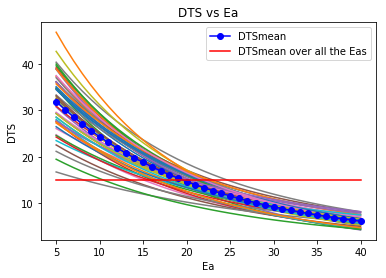

In [6]:
# Problem 2-2

# Constants
R=8.314 #J/(K.mol)
Ts=17+273 #K (Standard Temperature)
c=4184 # KCal to Joule Converter

def srt(Ea,Tij,Ts,R):    # Standard Reaction Time
    ts=math.exp((Ea*(Tij-Ts))/(R*Tij*Ts))  # Tij is daily average temperature.
    return ts

# Hibernation Days Train Test Split
Dtst=[]
for i in range(5):
    k=All_years.index(Test_years[i])
    Dtst=Dtst+[D[k]]
Dtrn=[]
for i in range(ltr):
    k=All_years.index(Training_years[i])
    Dtrn=Dtrn+[D[k]]
Ea=[i for i in range(5,41)]

DTSj=[]  # Number of Transformed Temperature Days 52X36
for i in range(ltr):
    x=trnd[trnd.year.isin([Training_years[i]])]
    d1=datetime.date(BDtrn.values[i][0],BDtrn.values[i][1],BDtrn.values[i][2])
    d2=datetime.date(BDtrn.values[i][0],1,1)
    d=(d1-d2).days+1 # Bloom days from January 1 including January 1
    DTS=[]  # Number of Transformed Temperature Days 1X36
    for Eax in Ea:
        TS=[]
        for j in range(Dtrn[i] - 1, d):  # Must subtract 1 from Hibernation day as it indicates the row number in data
            ts = srt(Eax*c,x.values[j][9]+273,Ts,R)
            TS=TS+[ts]
        DTS=DTS+[sum(TS)]
    DTSj=DTSj+[DTS]

#DTSmean
DTSmean=[]
for i in range(len(Ea)):
    DTSsum=0
    for j in range(ltr):
        DTSsum=DTSsum+DTSj[j][i]
    DTSmean=DTSmean+[DTSsum/ltr]
DTSmeanUltimate=round(sum(DTSmean)/len(Ea),3)
print("\nDTS mean over all the Eas:",DTSmeanUltimate)
DTSm=[DTSmeanUltimate for i in range(len(Ea))]

# Output Dataframe
df3={'Ea':Ea,'DTSmean':DTSmean}
df3=pd.DataFrame(data=df3)
df3=df3[['Ea','DTSmean']]
print('\n',df3)

# Plotting P 2-2
plt.figure(4)  # Put this line inside the loop for 52 different figures for different years.
for i in range(ltr):
    plt.plot(Ea,DTSj[i])#,label=("%d")%(Training_years[i])) Activate this line to show labels of the years.  
    plt.xlabel("Ea")    
    plt.ylabel("DTS")                               
    plt.title("DTS vs Ea")
plt.plot(Ea, DTSmean,"-bo",label="DTSmean")
plt.plot(Ea,DTSm,"r",label="DTSmean over all the Eas")
plt.legend()
plt.show()

### Problem 2-3: (11pts)
Using the same $E_{a}$ values and calculated $DTS_{mean}$ from 2-2, predict the bloom date $BD_{j}$ for each of the training years. Find the mean squared error relative to the actual $BD$ and plot it against $E_{a}$. Find the optimal $E_{a}^{*}$ that minimizes that error on the training data.


Prediction using Linear Regression(Training Years):
 [[[1961    3   24]
  [1961    3   24]
  [1961    3   25]
  ..., 
  [1961    4    2]
  [1961    4    2]
  [1961    4    2]]

 [[1962    3   25]
  [1962    3   26]
  [1962    3   26]
  ..., 
  [1962    4    2]
  [1962    4    2]
  [1962    4    2]]

 [[1963    3   24]
  [1963    3   24]
  [1963    3   25]
  ..., 
  [1963    4    1]
  [1963    4    1]
  [1963    4    1]]

 ..., 
 [[2015    3   28]
  [2015    3   28]
  [2015    3   27]
  ..., 
  [2015    3   27]
  [2015    3   27]
  [2015    3   27]]

 [[2016    3   28]
  [2016    3   28]
  [2016    3   28]
  ..., 
  [2016    3   21]
  [2016    3   20]
  [2016    3   20]]

 [[2017    3   27]
  [2017    3   27]
  [2017    3   27]
  ..., 
  [2017    3   31]
  [2017    3   31]
  [2017    3   31]]]

     Ea        MSE
0    5  54.903846
1    6  50.384615
2    7  45.403846
3    8  40.307692
4    9  37.230769
5   10  33.461538
6   11  29.692308
7   12  26.538462
8   13  24.750000
9   14  22.00

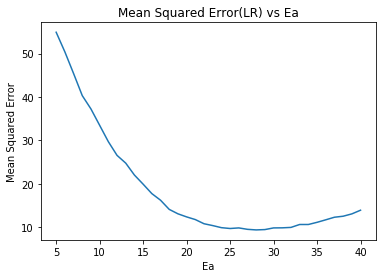

In [7]:
# Problem 2-3

# Bloom Date prediction using Linear Regression(Training Years)
BDpredLR=[]  # 52 X 36 X 3
for i in range(ltr):
    x=trnd[trnd.year.isin([Training_years[i]])]
    predLR=[]
    for j in range(len(Ea)):
        acts=0
        h=Dtrn[i]-1
        while acts<DTSmean[j]:
            try:
                acts=acts+srt(Ea[j]*c,x.values[h][9]+273,Ts,R)
                h=h+1
            except:
                break  # This Exception Handler has been used to prevent the out of bounds condition for the year:2017
        h=h-1 # This is the row number of the predicted Bloom Date of a particular Training Year
        p=[x.values[h][1],x.values[h][2],x.values[h][3]] # Predicted Bloom Date
        predLR=predLR+[p]
    BDpredLR=BDpredLR+[predLR]
BDpredLR=np.asarray(BDpredLR,dtype=int) # Contains Bloom Date for each Ea determined by Linear Regression 52 X 36 X 3

# Mean Squared Error
MSELR=[]
for i in range(len(Ea)):
    sesum=0
    for j in range(ltr):
        d1=datetime.date(BDtrn.values[j][0],BDtrn.values[j][1],BDtrn.values[j][2])
        d2=datetime.date(BDpredLR[j][i][0],BDpredLR[j][i][1],BDpredLR[j][i][2])
        d=abs(d1-d2).days
        sesum=sesum+d**2
    MSELR=MSELR+[(sesum/ltr)] 
# Optimal Ea
Optimal_Ea=Ea[MSELR.index(min(MSELR))]
    
# Output Dataframe
print("\nPrediction using Linear Regression(Training Years):\n",BDpredLR)
df4={'Ea':Ea,'MSE':MSELR}
df4=pd.DataFrame(data=df4)
df4=df4[['Ea','MSE']]
print('\n',df4)
print("\nOptimal Ea:",Optimal_Ea)

# Plotting P 2-3
plt.figure(5)
plt.plot(Ea,MSELR)
plt.xlabel("Ea")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error(LR) vs Ea")
plt.show()

### Problem 2-4: (4pts)

Using the $D_j$ dates from problem 2-1, the average $DTS_{mean}$ from 2-2, and the best-fit $E_{a}^{*}$ from 2-3, predict the bloom-dates $BD_j$ for the years in the test set. Determine the error between your predicted $BD_j$ values and the actual values, and evaluate this model using the coefficient of determination ($R^2$ score).

In [8]:
# Problem 2-4

# Finding the DTSmean for the best Ea
Optimal_DTSmean=DTSmean[Ea.index(Optimal_Ea)]
# Prediction using Optimal Ea(Test Years)
BDpredOEa=[]
for i in range(5):
    x=tstd[tstd.year.isin([Test_years[i]])]
    acts=0
    h=Dtst[i]-1
    while acts<Optimal_DTSmean:
        acts=acts+srt(Optimal_Ea*c,x.values[h][9]+273,Ts,R)
        h=h+1
    h=h-1 # This is the row number of the predicted Bloom Date of a particular Test Year
    p=[x.values[h][1],x.values[h][2],x.values[h][3]]
    BDpredOEa=BDpredOEa+[p]
BDpredOEa=np.asarray(BDpredOEa,dtype=int)
# Error for Optimal Ea
ErOEa=[]
for i in range(5):
    d1=datetime.date(BDpredOEa[i][0],BDpredOEa[i][1],BDpredOEa[i][2])
    d2=datetime.date(BDtst.values[i][0],BDtst.values[i][1],BDtst.values[i][2])
    d=abs(d1-d2).days
    ErOEa=ErOEa+[d]
PDaysOEa=[]  # Predicted difference in days from January 1 including January 1
for i in range(5):
    d1=datetime.date(BDpredOEa[i][0],BDpredOEa[i][1],BDpredOEa[i][2])
    d2=datetime.date(BDtst.values[i][0],1,1)
    dp=abs(d1-d2).days+1
    PDaysOEa=PDaysOEa+[dp]
R2OEa=mc.r2_score(ADays,PDaysOEa) # Sklearn Builtin function
R2OEa=float("{:.3f}".format(R2OEa))

# Output Dataframe
print('\nActual Bloom Dates:\n',BDtst)
print('Prediction using Optimal Ea:\n',BDpredOEa)
df5={'Test Years':Test_years,'Error for Optimal Ea in Days':ErOEa}
df5=pd.DataFrame(data=df5)
df5=df5[['Test Years','Error for Optimal Ea in Days']]
print(df5)
print("\nR-Square Score(Optimal Ea):",R2OEa)


Actual Bloom Dates:
     year  month  day
5   1966      3   20
10  1971      3   30
24  1985      4    3
33  1994      3   31
47  2008      3   22
Prediction using Optimal Ea:
 [[1966    3   20]
 [1971    3   29]
 [1985    4    1]
 [1994    4    1]
 [2008    3   23]]
   Test Years  Error for Optimal Ea in Days
0        1966                             0
1        1971                             1
2        1985                             2
3        1994                             1
4        2008                             1

R-Square Score(Optimal Ea): 0.949


### Problem 2-5: (extra 10pts)
Discuss any improvements you could make to the model outlined above. If you have a suggestion in particular, describe it. How much do you think the accuracy would be improved?

In [9]:
# Problem 2-5

# Improvements that can be made to the model:
  #1 Number of years taken into consideration can be increased for better resolution. 
  #2 Temperature is the only feature taken into account in this model, the model can be calibrated for other features. 
  #3 The assumptions made to establish the model might not withstand under certain circumstances. 
       # Both the Arrhenius activation energy Ea and the rate constant k are experimentally determined,
       # and represent macroscopic reaction-specific parameters that are not simply related to threshold 
       # energies and the success of individual collisions at the molecular level.
       # So, a more complicated yet fruitful equation can be derived for DTSj.  
  #4 The equation of Hayashi et al.(2012) for determining the end of Hibernation is just a mere approximation.
       # It can be modified considering discrepencies.
  #5 As the temperature increases, the molecules move faster and therefore collide more frequently.
       # The molecules also carry more kinetic energy. Thus, the proportion of collisions that can overcome
       # the activation energy for the reaction increases with temperature. So, Ea decreases with T. 
       # So, "Ea is independent of T" - does not always hold.
       # This consideration can be made to modify the model. 
  #6 Catalysts increase the rate of reaction. Presence of such catalysts in an area's soil can be investigated. 
  #7 R-squared score can sometime mislead. Proper alternative can be taken into consideration for the model. 

# These are the suggestions in particular. 
# I think the accuracy would be improved up to a little but noticable value.

***
## 3. Predicting Bloom-date via Neural Network (30pts total)

### Problem 3-1: (20pts)

Build a neural network and train it on the data from the training years. Use this model to predict the bloom-dates for each year in the test set. Evaluate the error between predicted dates and actual dates using the coefficient of determination (R2 score). Only use the weather data given in `tokyo.csv` and the sakura data acquired in problem 0-1.</br>
You may use whichever framework or strategy that you like to construct the network. 

In [10]:
# Problem 3-1

# Neural Network
NNPPD=Sakura

# A sincere observation of the Data shows that the Bloom Dates are within the first 4 months of a year.
# The Features within the end of Hibernation Phase up to the Bloom Date have significant impact on the Bloom Date.
# An assumption that the effect of the values of the features for other months is lumped to the first 3 months is valid.
# So, each year's first 4 months have been focused.

NNPPD=NNPPD[NNPPD.month <= 3]  # Neural Network Preprocessed Data.
CNL=list(NNPPD)
CNL=CNL[4:15]  # Column Names' List(Containing Effective Features)
UWL=['serial','year','month','day','bloom']  # Unwanted Columns
U=[1961,1963,1964,1965,1969,1970,1972,1973,1981,1982,1983,1984,1986,1987, \
   1991,1992,1993,1995,1996,2004,2005,2006,2007,2009,2010]
YI=[Training_years.index(U[i]) for i in range(len(U))]

# Preparing Train Set
Xtrn=[]
Ytrn=[]
for i in range(len(YI)):
    x=NNPPD[NNPPD.year.isin([Training_years[YI[i]]])] 
    x=x.drop(UWL,1)
    x=x.sum()
    Xtrn=Xtrn+[x]
    d1=datetime.date(BDtrn.values[YI[i]][0],BDtrn.values[YI[i]][1],BDtrn.values[YI[i]][2])
    d2=datetime.date(BDtrn.values[YI[i]][0],1,1)
    d=(d1-d2).days+1
    Ytrn=Ytrn+[d]

# Preparing Test Set
Xtst=[]
Ytst=[]
for i in range(5):
    x=NNPPD[NNPPD.year.isin([Test_years[i]])]
    x=x.drop(UWL,1)
    x=x.sum()
    Xtst=Xtst+[x]
    d1=datetime.date(BDtst.values[i][0],BDtst.values[i][1],BDtst.values[i][2])
    d2=datetime.date(BDtst.values[i][0],1,1)
    d=(d1-d2).days+1
    Ytst=Ytst+[d]

# Learner
hl=[10 for i in range(21)]
hl=tuple(hl)
rgr=sklearn.neural_network.MLPRegressor(hidden_layer_sizes=hl,activation='identity',solver="lbfgs", \
                                        alpha=20,learning_rate='invscaling',random_state=10)
rgr=rgr.fit(Xtrn,Ytrn)

# Output
BDpredNN=[]
PDaysNN=rgr.predict(Xtst)
PDaysNN=[int(PDaysNN[i]) for i in range(5)]
for i in range(5):
    x=tstd[tstd.year.isin([Test_years[i]])]
    r=PDaysNN[i]-1
    d=[x.values[r][1],x.values[r][2],x.values[r][3]]
    BDpredNN=BDpredNN+[d]
BDpredNN=np.asarray(BDpredNN,dtype=int) # Bloom Dates(Predicted)
R2NN=round(rgr.score(Xtst,Ytst),2)      # R-Square Score

# Output Dataframe
print("\nActual Bloom Dates:\n",BDtst)
print("Prediction using Neural Network:\n",BDpredNN)
print("\nR-Square Score(Neural Network):",R2NN)


Actual Bloom Dates:
     year  month  day
5   1966      3   20
10  1971      3   30
24  1985      4    3
33  1994      3   31
47  2008      3   22
Prediction using Neural Network:
 [[1966    3   20]
 [1971    3   31]
 [1985    4    3]
 [1994    3   29]
 [2008    3   23]]

R-Square Score(Neural Network): 0.94


### Problem 3-2: (10pts)
Compare the performance (via $R^2$ score) of the 3 implementations above: the 600 Degree Rule, the DTS method, and the neural network approach. For all methods, and each test year, plot the predicted date vs. the actual date. Discuss the accuracy and differences of these 3 models.


R-Square Score(Tmean): 0.832
R-Square Score(600): 0.679
R-Square Score(DTS): 0.949
R-Square Score(Neural Network): 0.94

Comparison of Performance:
The DTS method perfoms better than the 600 Degree Rule which is obvious because 600 Degree Rule takes into account only one feature(Daily Max Temperature) whereas the DTS method goes for a more sophisticated approach taking intoaccount Hibernation pattern, Temperature, Activation Energy, Standard Reaction Time etc.
The Neural Network also performs well but it requires finding the most optimized network by parameter tuning.


Bloom Dates are Converted into diffence in days from January 1.


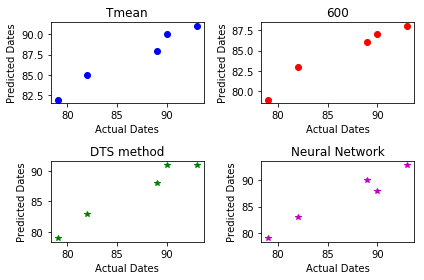

Discussion:
The DTS method and the Neural Network show more accuracy. The differences between the 3 methods are structural.
The basic differences have been discussed earlier. It is to be added that the Neural Network uses more features than the
others. One thing is noticeable that the Bloom Date delays as year passes by. Neural Network has one exception in this.


In [11]:
# Problem 3-2

print("\nR-Square Score(Tmean):",R2T)
print("R-Square Score(600):",R26)
print("R-Square Score(DTS):",R2OEa)
print("R-Square Score(Neural Network):",R2NN)
print("\nComparison of Performance:")
print('''The DTS method perfoms better than the 600 Degree Rule which is obvious because 600 Degree Rule takes into \
account only one feature(Daily Max Temperature) whereas the DTS method goes for a more sophisticated approach taking into\
account Hibernation pattern, Temperature, Activation Energy, Standard Reaction Time etc.
The Neural Network also performs well but it requires finding the most optimized network by parameter tuning.''')


# Plotting P 3-2
print("\n\nBloom Dates are Converted into diffence in days from January 1.")
plt.figure(6)
plt.subplot(2,2,1)
plt.plot(ADays,PDaysT,"bo")
plt.xlabel("Actual Dates")
plt.ylabel("Predicted Dates")
plt.title("Tmean")
plt.subplot(2,2,2)
plt.plot(ADays,PDays6,"ro")
plt.xlabel("Actual Dates")
plt.ylabel("Predicted Dates")
plt.title("600")
plt.subplot(2,2,3)
plt.plot(ADays,PDaysOEa,"g*")
plt.xlabel("Actual Dates")
plt.ylabel("Predicted Dates")
plt.title("DTS method")
plt.subplot(2,2,4)
plt.plot(ADays,PDaysNN,"m*")
plt.xlabel("Actual Dates")
plt.ylabel("Predicted Dates")
plt.title("Neural Network")
plt.tight_layout()
plt.show()

# Discussion
print("Discussion:")
print("The DTS method and the Neural Network show more accuracy. The differences between the 3 methods are structural.\n\
The basic differences have been discussed earlier. It is to be added that the Neural Network uses more features than the\n\
others. One thing is noticeable that the Bloom Date delays as year passes by. Neural Network has one exception in this.")

***
## 4. Trends of the Sakura blooming phenomenon (20pts total)

### Problem 4-1: (20pts)
Based on the data from the past 60 years, investigate and discuss trends in the sakura hibernation ($D_{j}$) and blooming ($BD_{j}$) phenomena in Tokyo.

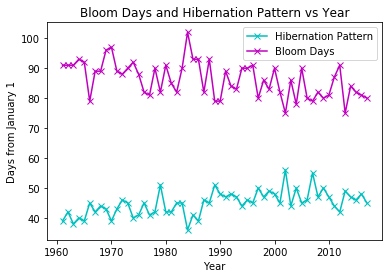

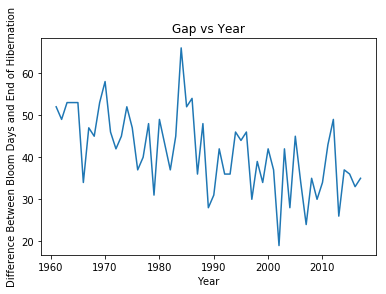

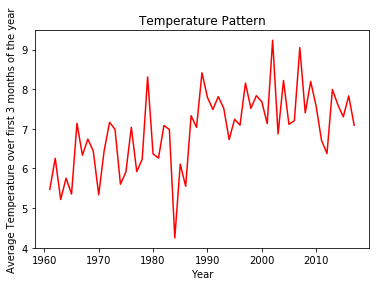

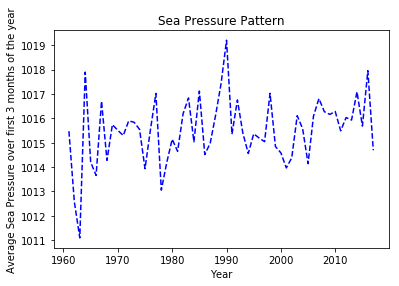


Discussion:
From the Graphs of 4-1, it is clear that the Hibernation Pattern has changed over the past 60 years. In recent
years, End of Hibernation takes place with a noticeable delay compared to the past years although there are fluctuations.
This scenario is verified by the Graph of 1-1 as it tells that the Accumulated Max Temperature has decreased over the
years. Temperature has a direct impact on Hibernation Pattern. As it decreases, Hibernation Period tends to get longer.
Blooming of Sakura in recent years also comes earlier compared to the past years. Sea Pressure might have effect on that.



In [12]:
# Problem 4-1

# Conversion from Bloom Dates to Days from January 1 and Investigation of some features
BloomDays=[]
G=[]  # Gap
TemperaturePattern=[]
SeaPressure=[]
for i in range(len(All_years)):
    d1=datetime.date(BD.values[i][0],BD.values[i][1],BD.values[i][2])
    d2=datetime.date(BD.values[i][0],1,1)
    d=(d1-d2).days+1
    BloomDays=BloomDays+[d]
    G=G+[BloomDays[i]-D[i]]
    x=Sakura[Sakura.year.isin([All_years[i]])]
    x=x[x.month <= 3]
    x=x['avg temp']
    x=x.mean()
    TemperaturePattern=TemperaturePattern+[x]
    x=Sakura[Sakura.year.isin([All_years[i]])]
    x=x[x.month <= 3]
    x=x['sea pressure']
    x=x.mean()
    SeaPressure=SeaPressure+[x]
print('\n')

# Plotting P 4-1
plt.figure(7)
plt.plot(All_years,D,'-cx',label='Hibernation Pattern')
plt.plot(All_years,BloomDays,'-mx',label='Bloom Days')
plt.xlabel('Year')
plt.ylabel('Days from January 1')
plt.title('Bloom Days and Hibernation Pattern vs Year')
plt.legend()
plt.figure(8)
plt.plot(All_years,G)
plt.xlabel('Year')
plt.ylabel('Difference Between Bloom Days and End of Hibernation')
plt.title('Gap vs Year')
plt.figure(9)
plt.plot(All_years,TemperaturePattern,'-r')
plt.xlabel('Year')
plt.ylabel('Average Temperature over first 3 months of the year')
plt.title('Temperature Pattern')
plt.figure(10)
plt.plot(All_years,SeaPressure,'--b')
plt.xlabel('Year')
plt.ylabel('Average Sea Pressure over first 3 months of the year')
plt.title('Sea Pressure Pattern')
plt.show()

# Discussion
print('\nDiscussion:')
print('From the Graphs of 4-1, it is clear that the Hibernation Pattern has changed over the past 60 years. In recent\n\
years, End of Hibernation takes place with a noticeable delay compared to the past years although there are fluctuations.\n\
This scenario is verified by the Graph of 1-1 as it tells that the Accumulated Max Temperature has decreased over the\n\
years. Temperature has a direct impact on Hibernation Pattern. As it decreases, Hibernation Period tends to get longer.\n\
Blooming of Sakura in recent years also comes earlier compared to the past years. Sea Pressure might have effect on that.\n')